# Домашнее задание по теме «1.5. Обработка данных в Python. Библиотека Pandas»

Выполнил: Алексей Стакун (https://github.com/stakun)

Перевести ваш спарсенный json в формат csv таблицу через pandas.

Для hh.ru:
* Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)
* Какая средняя и медианная зарплата по группам вакансий?
* Какая средняя и медианная зарплата по каждому региону?
* Какая самая высокооплачиваемая из групп вакансий, исходя из их средних зарплат?
* Какое процентное соотношение каждого региона по вакансиям от всех вакансий?
* Какая корреляция уровня опыта от зарплаты?
* Сколько должностей в наборе данных?
* Какие 10 наиболее часто встречающихся должностей?

Либо все то же, но для датасета https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [60]:
# импорт необходимых библиотек

%matplotlib inline
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats


## Датасет hh_data

In [64]:
# открытие исходного датасета из файла json

with open("/content/hh_data.json", "r") as file:
  data = json.load(file)

In [78]:
# импортируем данные в список

data_list = [] # пустой список для датасета
for i in data["data"]:
  data_list.append([i["title"],i["work experience"],i["salary"],i["region"]])

In [79]:
# получаем из исходного файла названия колонок датафрейма

data["data"][0].keys()

dict_keys(['title', 'work experience', 'salary', 'region'])

In [82]:
# импортируем данные в датафрейм Pandas

hh_data = pd.DataFrame(data_list, columns=data["data"][0].keys())
hh_data.rename(columns = {'work experience' : 'work_experience'}, inplace = True)
hh_data

,title,work_experience,salary,region
0,Python-разработчик систем сбора,1–3 года,от 100 000 до 150 000 руб. на руки,"Москва, Трубная и еще 2"
1,Python-разработчик,1–3 года,з/п не указана,Москва
2,Разработчик Python,3–6 лет,з/п не указана,"Москва, Молодежная"
3,Python разработчик,1–3 года,з/п не указана,Киров (Кировская область)
4,Fullstack Python-разработчик,3–6 лет,от 150 000 до 200 000 руб. на руки,Тюмень
...,...,...,...,...
361,Специалист службы поддержки с техническими зна...,не требуется,от 15 000 руб. на руки,Уссурийск
362,Разработчик 1С УХ,1–3 года,з/п не указана,Москва
363,Руководитель направления предиктивной аналитики,3–6 лет,з/п не указана,Москва
364,"Middle/Senior Data-аналитик команды ""Управлени...",1–3 года,з/п не указана,"Москва, Выставочная и еще 2"


In [83]:
# Изучим общую информацию о датасете

hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            366 non-null    object
 1   work_experience  366 non-null    object
 2   salary           366 non-null    object
 3   region           366 non-null    object
dtypes: object(4)
memory usage: 11.6+ KB


**Вывод:** датасет импортирован корректно, пропуски в данных отсутствуют

### Изучение уникальных значений датасета

In [84]:
# Считаем количество уникальных должностей в датасете

vacancy_count_hh = len(np.unique(hh_data['title']))
print(f'Количество уникальных должностей в датасете: {vacancy_count_hh}')

Количество уникальных должностей в датасете: 282


In [74]:
# Выводим список уникальных должностей в датасете

hh_data['title'].unique()

array(['Python-разработчик систем сбора', 'Python-разработчик',
       'Разработчик Python', 'Python разработчик',
       'Fullstack Python-разработчик', 'Python Developer (Crypto)',
       'Senior Python-разработчик', 'Программист Python',
       'Middle backend Python developer',
       'Middle/Middle+ Backend Developer (Python)',
       'Backend разработчик python',
       'Разработчик Python / Python Backend Developer',
       'Python Team Lead / Руководитель backend разработки (в аккредитованную ИТ компанию)',
       'Python Developer', 'Middle/Senior Python разработчик (удаленно)',
       'Middle Python Developer',
       'Преподаватель программирования Python для детей (удаленно)',
       'Junior Full Stack Web-разработчик (Python)',
       'Backend Developer (Python)',
       'Python Разработчик в Яндекс Рассылки (remote)',
       'Senior Backend Python Developer', 'Разработчик Back-end',
       'Middle/Senior Python Developer',
       'Программист баз данных и backend (Postgre

In [89]:
# Считаем количество уникальных work_experience в датасете

work_experience_count_hh = len(np.unique(hh_data['work_experience']))
print(f'Количество уникальных work_experience в датасете: {work_experience_count_hh}')

Количество уникальных work_experience в датасете: 4


In [87]:
# Выводим список уникальных должностей в датасете

hh_data['work_experience'].unique()

array(['1–3 года', '3–6 лет', 'не требуется', 'более 6 лет'], dtype=object)

In [90]:
# Считаем количество уникальных salary в датасете

salary_count_hh = len(np.unique(hh_data['salary']))
print(f'Количество уникальных salary в датасете: {salary_count_hh}')

Количество уникальных salary в датасете: 89


In [91]:
# Выводим список уникальных должностей в датасете

hh_data['salary'].unique()

array(['от 100\xa0000 до 150\xa0000 руб. на руки', 'з/п не указана',
       'от 150\xa0000 до 200\xa0000 руб. на руки',
       'от 5\xa0000 до 7\xa0000 EUR на руки',
       'от 200\xa0000 руб. на руки',
       'от 400\xa0000 до 450\xa0000 руб. на руки',
       'до 250\xa0000 руб. на руки',
       'от 90\xa0000 руб. до вычета налогов', 'от 70\xa0000 руб. на руки',
       'от 25\xa0000 до 55\xa0000 руб. на руки',
       'от 150\xa0000 до 150\xa0000 руб. до вычета налогов',
       'от 150\xa0000 до 180\xa0000 руб. до вычета налогов',
       'до 330\xa0000 руб. до вычета налогов',
       'до 300\xa0000 руб. до вычета налогов',
       'от 90\xa0000 руб. на руки', 'до 80\xa0000 руб. на руки',
       'от 150\xa0000 руб. на руки',
       'от 300\xa0000 руб. до вычета налогов',
       'от 100\xa0000 до 190\xa0000 руб. на руки',
       'от 200\xa0000 до 300\xa0000 руб. на руки',
       'от 180\xa0000 руб. на руки',
       'от 200\xa0000 до 400\xa0000 руб. на руки',
       'от 115\xa0000 до 220\x

In [92]:
# Считаем количество уникальных region в датасете

region_count_hh = len(np.unique(hh_data['region']))
print(f'Количество уникальных region в датасете: {region_count_hh}')

Количество уникальных region в датасете: 117


In [93]:
# Выводим список уникальных region в датасете

hh_data['region'].unique()

array(['Москва, Трубная и еще\xa02\xa0', 'Москва', 'Москва, Молодежная',
       'Киров (Кировская область)', 'Тюмень', 'Екатеринбург',
       'Новосибирск', 'Санкт-Петербург', 'Москва, Калужская',
       'Москва, Мякинино и еще\xa03\xa0', 'Ростов-на-Дону',
       'Москва, Мякинино и еще\xa01\xa0', 'Казань', 'Рязань', 'Иннополис',
       'Москва, Чертановская', 'Зеленоград', 'Москва, Деловой центр',
       'Москва, Киевская', 'Пермь', 'Москва, Кутузовская', 'Ярославль',
       'Москва, Гражданская и еще\xa02\xa0', 'Москва, Курская',
       'Нижний Новгород', 'Воронеж', 'Москва, Кожуховская',
       'Москва, Кутузовская и еще\xa01\xa0',
       'Москва, Волгоградский проспект',
       'Москва, Краснопресненская и еще\xa01\xa0', 'Москва, Перово',
       'Екатеринбург, Динамо', 'Москва, Дмитровская и еще\xa02\xa0',
       'Самара, Гагаринская', 'Челябинск', 'Нижний Новгород, Горьковская',
       'Хабаровск', 'Тула', 'Самара',
       'Санкт-Петербург, Лиговский проспект', 'Москва, Новослобод

**Вывод:** полученный в результате парсинга датасет требует трудоемкой предобработки данных. В связи с дефицитом времени на выполнение домашнего задания, принято решение выполнить его для датасета data-science-job-salaries

## Датасет ds_salaries

In [4]:
# импортируем данные в датафрейм Pandas

ds_salaries = pd.read_csv('/content/ds_salaries.csv', index_col='Unnamed: 0')
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# Изучим общую информацию о датасете

ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


**Вывод:** датасет импортирован корректно, пропуски в данных отсутствуют

### Описание датасета

Column | Description
---|---
work_year | The year the salary was paid
experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
job_title | The role worked in during the year
salary | The total gross salary amount paid
salary_currency | The currency of the salary paid as an ISO 4217 currency code
salary_in_usd | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
employee_residence | Employee's primary country of residence in during the work year as an ISO 3166 country code
remote_ratio | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
company_location | The country of the employer's main office or contracting branch as an ISO 3166 country code
company_size | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)



## Группировка вакансий по направлениям
**Задача:** Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)

**План решения:**


1.   Сформируем список уникальных значений наименований вакансий
2. Определим список ключевых слов для категоризации вакансий по направлениям деятельности
2.   Напишем функцию для категоризации вакансий по направлениям. Эта функция на основании данных из столбца 'job_title' сформирует в датафрейме новый столбец, содержащий код направления (DS, DE, Software Engenering, etc.)
3. Применим созданную функцию методом apply()



In [6]:
# Считаем количество уникальных должностей в датасете

vacancy_count = len(np.unique(ds_salaries['job_title']))
print(f'Количество уникальных должностей в датасете: {vacancy_count}')

Количество уникальных должностей в датасете: 50


In [7]:
# 1. Формируем список уникальных значений наименований вакансий c количеством записей по каждой вакансии

ds_salaries['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

**Выводы:**

1.   Количество уникальных должностей в датасете: 50
2.   Наиболее часто встречающиеся вакансии:

Должность | Кол-во вакансий
----|:----: 
Data Scientist | 143
Data Engineer | 132
Data Analyst | 97
Machine Learning Engineer | 41
Research Scientist | 16
Data Science Manager | 12
Data Architect | 11
Big Data Engineer | 8
Machine Learning Scientist | 8
Principal Data Scientist | 7
AI Scientist | 7
Data Science Consultant | 7
Director of Data Science | 7
Data Analytics Manager | 7



Распределим список наименований вакансий по категориям:

<table>
  <tr>
    <th>Категория</th>
    <th>Код</th>
    <th>Вакансии</th>
    <th>Ключевые слова</th>
  </tr>
  <tr>
    <td>Искусственный интеллект</td>
    <td>AI</td>
    <td>AI Scientist</td>
    <td>AI</td>            
  </tr>
  <tr>
    <td>Большие данные</td>
    <td>BD</td>
    <td>Big Data Engineer, Big Data Architect</td>
    <td>Big Data</td>
  </tr>
  <tr>
    <td>Анализ данных</td>
    <td>DA</td>
    <td>Data Analyst, Research Scientist, Data Analytics Manager,<br> BI Data Analyst, Business Data Analyst, Analytics Engineer,<br> Data Analytics Engineer, Lead Data Analyst, Principal Data Analyst,<br> Product Data Analyst, Financial Data Analyst, Finance Data Analyst,<br> Marketing Data Analyst, Data Analytics Lead</td>
    <td>Analy, Research Scientist</td>
  </tr>
  <tr>
    <td>Инженер данных</td>
    <td>DE</td>
    <td>Data Engineer, Data Architect, Lead Data Engineer,<br> Data Engineering Manager, Principal Data Engineer,<br> ETL Developer, Director of Data Engineering, Cloud Data Engineer</td>
    <td>Data Engin, ETL, Data Architect</td>
  </tr>
  <tr>
    <td>Глубокое обучение</td>
    <td>DL</td>
    <td>Computer Vision Engineer, Computer Vision Software Engineer,<br>  3D Computer Vision Researcher, NLP Engineer</td>
    <td>Computer Vision, NLP</td>
  </tr>
  <tr>
    <td>Data Science</td>
    <td>DS</td>
    <td>Data Scientist, Data Science Manager, Principal Data Scientist,<br> Data Science Consultant, Director of Data Science, Head of Data,<br> Applied Data Scientist, Head of Data Science, Lead Data Scientist,<br> Data Science Engineer, Data Specialist, Staff Data Scientist</td>
    <td>Data Scien, Head of Data, Data Specialist</td>
  </tr>    
  <tr>
    <td>Машинное обучение</td>
    <td>ML</td>
    <td>Machine Learning Engineer, Machine Learning Scientist, ML Engineer,<br> Applied Machine Learning Scientist, Machine Learning Developer,<br> Machine Learning Infrastructure Engineer, Lead Machine Learning Engineer,<br> Head of Machine Learning, Machine Learning Manager	</td>
    <td>Machine Learning, ML</td>
  </tr>
 </table>

 Распределение сделано на основе статьи: https://netology.ru/blog/03-2019-data-science-obzor

In [8]:
# Создадим функцию, которая на основе данных из столбца `job_title`
# сформирует новый столбец `job_category`в которые войдут определенные
# нами категории.

def categorize_job(list):
  if "AI" in list:
    return "AI"
  elif "Big Data" in list:
    return "BD"
  elif "Analy" in list:
    return "DA"
  elif "Research Scientist" in list:
    return "DA"
  elif "Data Engin" in list:
    return "DE"
  elif "ETL" in list:
    return "DE"
  elif "Data Architect" in list:
    return "DE"
  elif "Computer Vision" in list:
    return "DL"
  elif "NLP" in list:
    return "DL"    
  elif "Data Scien" in list:
    return "DS"
  elif "Head of Data" in list:
    return "DS"
  elif "Data Specialist" in list:
    return "DS"
  elif "Machine Learning" or "ML" in list:
    return "ML" 
  else:
    return "Other"            

In [9]:
# Категоризуем датасет по направлениям вакансий

ds_salaries['job_category'] = ds_salaries['job_title'].apply(categorize_job)

In [10]:
# Проверяем категоризацию, выводя на экран списки вакансий, попавших в каждую
# категорию и сверяя с сформированной нами таблицей категорий вакансий

ds_salaries.loc[ds_salaries['job_category'] == 'AI']['job_title'].value_counts()

AI Scientist    7
Name: job_title, dtype: int64

In [11]:
ds_salaries.loc[ds_salaries['job_category'] == 'BD']['job_title'].value_counts()

Big Data Engineer     8
Big Data Architect    1
Name: job_title, dtype: int64

In [12]:
ds_salaries.loc[ds_salaries['job_category'] == 'DA']['job_title'].value_counts()

Data Analyst               97
Research Scientist         16
Data Analytics Manager      7
BI Data Analyst             6
Business Data Analyst       5
Data Analytics Engineer     4
Analytics Engineer          4
Lead Data Analyst           3
Product Data Analyst        2
Financial Data Analyst      2
Principal Data Analyst      2
Marketing Data Analyst      1
Finance Data Analyst        1
Data Analytics Lead         1
Name: job_title, dtype: int64

In [13]:
ds_salaries.loc[ds_salaries['job_category'] == 'DE']['job_title'].value_counts()

Data Engineer                   132
Data Architect                   11
Lead Data Engineer                6
Data Engineering Manager          5
Principal Data Engineer           3
Cloud Data Engineer               2
Director of Data Engineering      2
ETL Developer                     2
Name: job_title, dtype: int64

In [14]:
ds_salaries.loc[ds_salaries['job_category'] == 'DL']['job_title'].value_counts()

Computer Vision Engineer             6
Computer Vision Software Engineer    3
3D Computer Vision Researcher        1
NLP Engineer                         1
Name: job_title, dtype: int64

In [15]:
ds_salaries.loc[ds_salaries['job_category'] == 'DS']['job_title'].value_counts()

Data Scientist              143
Data Science Manager         12
Data Science Consultant       7
Director of Data Science      7
Principal Data Scientist      7
Head of Data                  5
Applied Data Scientist        5
Head of Data Science          4
Lead Data Scientist           3
Data Science Engineer         3
Data Specialist               1
Staff Data Scientist          1
Name: job_title, dtype: int64

In [16]:
ds_salaries.loc[ds_salaries['job_category'] == 'ML']['job_title'].value_counts()

Machine Learning Engineer                   41
Machine Learning Scientist                   8
ML Engineer                                  6
Applied Machine Learning Scientist           4
Machine Learning Infrastructure Engineer     3
Machine Learning Developer                   3
Machine Learning Manager                     1
Head of Machine Learning                     1
Lead Machine Learning Engineer               1
Name: job_title, dtype: int64

**Вывод:** категоризация вакансий по направлениям произведена корректно

### Средняя и медианная зарплата по группам ваканий
**Задача:** определить среднюю и медианную зарплату по группам вакансий

In [17]:
# Создадим сводную таблицу по категориям вакансий и применим агрегирующие
# функции к столбцам `salary` и `salary_in_usd`. Результат округлим до 2 знаков

np.round(pd.pivot_table(ds_salaries, index=['job_category'], values=['salary', 'salary_in_usd'], aggfunc=[np.mean, np.median]), 2)

mean                median              
                 salary salary_in_usd  salary salary_in_usd
job_category                                               
AI            290571.43      66135.57  120000       45896.0
BD            418333.33      57277.22  100000       60000.0
DA            196422.46      99929.10   99000       93000.0
DE            176079.17     122383.31  115000      112872.0
DL            131090.91      56809.73  102000       37236.0
DS            480622.26     120393.46  132500      117351.5
ML            527987.25     113026.13  120000       87932.0

**Вывод**: исходя из средних зарплат в пересчете в USD, самая высокооплачиваемая группа вакансий это — DE (инженер данных)

### Средняя и медианная зарплата по регионам
**Задача:** определить среднюю и медианную зарплату для каждого региона

В исходных данных определены по отдельности регион нахождения компании (столбец `company_location`) и регион места жительства сотрудников (столбец `employee_residence`). Определим средние и медианные зарплаты в местной валюте (столбец `salary`) и в пересчете в USD (столбец `salary_in_usd`) для обоих наборов данных

In [18]:
# Создадим сводную таблицу по регионам компаний (столбец `company_location`)
# и применим агрегирующие # функции к столбцам `salary` и `salary_in_usd`.
# Результат округлим до 2 знаков

np.round(pd.pivot_table(ds_salaries, index=['company_location'], values=['salary', 'salary_in_usd'], aggfunc=[np.mean, np.median]), 2)

mean                    median              
                       salary salary_in_usd      salary salary_in_usd
company_location                                                     
AE                  100000.00     100000.00    115000.0      115000.0
AS                 1335000.00      18053.00   1335000.0       18053.0
AT                   64000.00      72920.75     62000.0       69489.5
AU                  130333.33     108042.67    121000.0       87425.0
BE                   72500.00      85699.00     72500.0       85699.0
BR                   65200.00      18602.67     69600.0       18907.0
CA                  115306.67      99823.73     97500.0       81895.5
CH                  275000.00      64114.00    275000.0       64114.0
CL                30400000.00      40038.00  30400000.0       40038.0
CN                  199500.00      71665.50    199500.0       71665.5
CO                   21844.00      21844.00     21844.0       21844.0
CZ                   49499.50      50937.00     49499.5       50937.0
DE                   71289.96      81887.21     66000.0       78015.0
DK                  185000.00      54386.33    180000.0       45896.0
DZ                  100000.00     100000.00    100000.0      100000.0
EE                   30000.00      32974.00     30000.0       32974.0
ES                   47382.86      53060.14     42500.0       48371.5
FR                   56881.33      63970.67     48000.0       56738.0
GB                   62294.81      81583.04     60000.0       78526.0
GR                   47363.64      52293.09     45000.0       49461.0
HN                   20000.00      20000.00     20000.0       20000.0
HR                   40000.00      45618.00     40000.0       45618.0
HU                11000000.00      35735.00  11000000.0       35735.0
IE                   65000.00      71444.00     65000.0       71444.0
IL                  160000.00     119059.00    160000.0      119059.0
IN                 2065208.21      28581.75   1636000.0       22124.0
IQ                  100000.00     100000.00    100000.0      100000.0
IR                    4000.00       4000.00      4000.0        4000.0
IT                   31100.00      36366.50     31100.0       36366.5
JP                 3408666.67     114127.33   2355000.0       75682.0
KE                    9272.00       9272.00      9272.0        9272.0
LU                   38333.33      43942.67     50000.0       59102.0
MD                   18000.00      18000.00     18000.0       18000.0
MT                   24000.00      28369.00     24000.0       28369.0
MX                  279333.33      32123.33     60000.0       33511.0
MY                   40000.00      40000.00     40000.0       40000.0
NG                   30000.00      30000.00     30000.0       30000.0
NL                   49100.00      54945.75     49500.0       54021.0
NZ                  125000.00     125000.00    125000.0      125000.0
PK                   13333.33      13333.33     12000.0       12000.0
PL                  142500.00      66082.50    140000.0       41093.5
PT                   42100.00      47793.75     47700.0       54217.5
RO                   60000.00      60000.00     60000.0       60000.0
RU                  157500.00     157500.00    157500.0      157500.0
SG                  120000.00      89294.00    120000.0       89294.0
SI                   54000.00      63831.00     54000.0       63831.0
TR                  179333.33      20096.67    180000.0       20171.0
UA                   13400.00      13400.00     13400.0       13400.0
US                  187715.97     144055.26    136620.0      135000.0
VN                    4000.00       4000.00      4000.0        4000.0

In [19]:
# Создадим сводную таблицу по месту жительства работников (столбец `employee_residence`)
# и применим агрегирующие # функции к столбцам `salary` и `salary_in_usd`.
# Результат округлим до 2 знаков

np.round(pd.pivot_table(ds_salaries, index=['employee_residence'], values=['salary', 'salary_in_usd'], aggfunc=[np.mean, np.median]), 2)

mean                  median              
                         salary salary_in_usd    salary salary_in_usd
employee_residence                                                   
AE                    100000.00     100000.00    115000      115000.0
AR                     60000.00      60000.00     60000       60000.0
AT                     68000.00      76738.67     65000       74130.0
AU                    130333.33     108042.67    121000       87425.0
BE                     72500.00      85699.00     72500       85699.0
BG                     80000.00      80000.00     80000       80000.0
BO                     75000.00      75000.00     75000       75000.0
BR                     77933.33      54634.67     84800       21453.5
CA                    112627.59      97085.31    100000       85000.0
CH                    115000.00     122346.00    115000      122346.0
CL                  30400000.00      40038.00  30400000       40038.0
CN                    299000.00      43331.00    299000       43331.0
CO                     21844.00      21844.00     21844       21844.0
CZ                     69999.00      69999.00     69999       69999.0
DE                     73668.76      85552.56     67000       79197.0
DK                    240000.00      37252.50    240000       37252.5
DZ                    100000.00     100000.00    100000      100000.0
EE                     30000.00      32974.00     30000       32974.0
ES                     53010.67      57593.40     45000       49461.0
FR                     52512.22      59886.61     50000       57920.0
GB                     62110.36      81403.16     60000       78526.0
GR                     50461.54      56331.23     50000       54957.0
HK                     48000.00      66022.00     48000       66022.0
HN                     20000.00      20000.00     20000       20000.0
HR                     40000.00      45618.00     40000       45618.0
HU                  11000000.00      35997.00  11000000       35997.0
IE                     65000.00      71444.00     65000       71444.0
IN                   1870166.57      37322.33   1425000       22124.0
IQ                    100000.00     100000.00    100000      100000.0
IR                      4000.00       4000.00      4000        4000.0
IT                     53050.00      61600.00     31600       36366.5
JE                    100000.00     100000.00    100000      100000.0
JP                   2927428.57     103537.71    260000       74000.0
KE                      9272.00       9272.00      9272        9272.0
LU                     50000.00      59102.00     50000       59102.0
MD                     18000.00      18000.00     18000       18000.0
MT                     24000.00      28369.00     24000       28369.0
MX                    389000.00      18185.00    389000       18185.0
MY                    200000.00     200000.00    200000      200000.0
NG                     30000.00      30000.00     30000       30000.0
NL                     56280.00      60956.60     57000       62651.0
NZ                    125000.00     125000.00    125000      125000.0
PH                     45760.00      45760.00     45760       45760.0
PK                     25466.67      27462.83     16000       16000.0
PL                    135000.00      56177.50    130000       41093.5
PR                    160000.00     160000.00    160000      160000.0
PT                     39066.67      42862.50     47700       53090.0
RO                     43500.00      51419.00     43500       51419.0
RS                     21600.00      25532.00     21600       25532.0
RU                    105750.00     105750.00     72500       72500.0
SG                    140000.00     104176.50    140000      104176.5
SI                     54000.00      63831.00     54000       63831.0
TN                     29000.00      31875.00     29000       31875.0
TR                    179333.33      20096.67    180000       20171.0
UA                     13400.00      

### Доля каждого региона в общем количестве вакансий
**Задача:** Определить процентное соотношение каждого региона по вакансиям от всех вакансий.

In [20]:
# Создадим сводную таблицу по регионам расположения компаний
# c количеством вакансий для каждого региона
region_share = pd.pivot_table(ds_salaries, index=['company_location'], values=['salary'], aggfunc=['count'])

# Преобразуем строку заголовков сводной таблицы
region_share.columns = ['_'.join(str(s).strip() for s in col if s) for col in region_share.columns]
#region_share.reset_index(inplace=True)

# Добавим к сводной таблице столбец с долей региона по количеству вакансий
region_share['% of Total'] = round((region_share.count_salary / region_share.count_salary.sum() * 100), 2)

# Отсортируем полученную сводную таблицу по убыванию долей регионов
region_share.sort_values(by='% of Total', ascending=False)

,count_salary,% of Total
company_location,,
US,355,58.48
GB,47,7.74
CA,30,4.94
DE,28,4.61
IN,24,3.95
FR,15,2.47
ES,14,2.31
GR,11,1.81
JP,6,0.99


**Вывод:** Подавляющее количество вакансий (58,48%) приходится нв США. На втором месте (7,74%) — Великобритания. На третьем — Канада (4,94%)

### Корреляция уровня опыта от зарплаты
**Задача:** найти корреляцию уровня опыта от зарплаты.

В связи с тем, что нам необходимо установить корреляцию между категориальной (`experience_level`) и количественной переменной (`experience_level`) будем применять однофакторный дисперсионный анализ (ANOVA), который используется для определения того, существует ли статистически значимое различие между средними значениями трех или более независимых групп.

In [36]:
# Создадим новый датафрейм из исходного включив в него
# только столбцы `experience_level` и `salary_in_usd`

ds_salaries_2 = pd.DataFrame(ds_salaries, columns = ['experience_level', 'salary_in_usd'])
ds_salaries_2.head()

,experience_level,salary_in_usd
0,MI,79833
1,SE,260000
2,SE,109024
3,MI,20000
4,SE,150000


In [50]:
# Сгруппируем датасет по уровню опыта и рассчитаем описательные статистики

ds_salaries_2.groupby(by='experience_level').describe()

salary_in_usd                                         \
                         count           mean            std      min   
experience_level                                                        
EN                        88.0   61643.318182   44395.541126   4000.0   
EX                        26.0  199392.038462  117071.255697  69741.0   
MI                       213.0   87996.056338   63901.057478   2859.0   
SE                       280.0  138617.292857   57691.978337  18907.0   

                                                           
                       25%       50%        75%       max  
experience_level                                           
EN                 27505.0   56500.0   85425.75  250000.0  
EX                130006.5  171437.5  233750.00  600000.0  
MI                 48000.0   76940.0  112000.00  450000.0  
SE                100000.0  135500.0  170000.00  412000.0

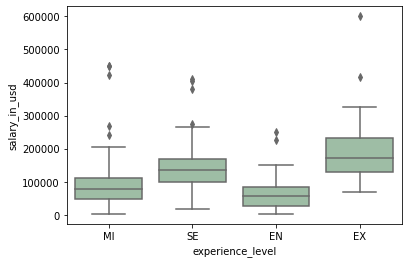

In [54]:
# Проверка нормальности распределения зарплат внутри групп
# уровня опыта.

ax = sns.boxplot(x='experience_level', y='salary_in_usd', data=ds_salaries_2, color='#99c2a2')
#ax = sns.swarmplot(x='experience_level', y='salary_in_usd', data=ds_salaries_2, color='#7d0013')
plt.show()

**Формулировка статистической гипотезы:**

*  H0 — нет статистически значимой разницы уровня средней зарплаты в USD среди групп с различным опытом работы
*  H1 — есть статистически значимая разница уровня средней зарплаты в USD по меньшей мере среди 2 групп с различным опытом работы

In [61]:
en_level = ds_salaries_2.loc[ds_salaries_2['experience_level'] == 'EN']
ex_level = ds_salaries_2.loc[ds_salaries_2['experience_level'] == 'EX']
mi_level = ds_salaries_2.loc[ds_salaries_2['experience_level'] == 'MI']
se_level = ds_salaries_2.loc[ds_salaries_2['experience_level'] == 'SE']

In [62]:
fvalue, pvalue = stats.f_oneway(en_level['salary_in_usd'], ex_level['salary_in_usd'], mi_level['salary_in_usd'], se_level['salary_in_usd'])
print(fvalue, pvalue)

64.67551541055848 2.8818473464173216e-36


**Вывод:** поскольку значение p-value в тесте ANOVA (2.8818473464173216e-36) меньше 0,05, у нас есть достаточно доказательств, чтобы отклонить нулевую гипотезу. Это означает, что средняя зарплата статистически значимо различается в группах по уровню опыта.